In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [11]:
column_names = ["Sample code number",            
                "Clump Thickness",              
                "Uniformity of Cell Size",       
                "Uniformity of Cell Shape",
                "Marginal Adhesion",
                "Single Epithelial Cell Size",
                "Bare Nuclei",
                "Bland Chromatin",
                "Normal Nucleoli",
                "Mitoses",
                "Class"
                ]

column_names = [col.lower() for col in column_names]
column_names = [col.replace(" ", "_") for col in column_names]

df = pd.read_csv("data/breast-cancer-wisconsin.csv", header=None, names=column_names, na_values='?')

In [12]:
df.head()

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sample_code_number           699 non-null    int64  
 1   clump_thickness              699 non-null    int64  
 2   uniformity_of_cell_size      699 non-null    int64  
 3   uniformity_of_cell_shape     699 non-null    int64  
 4   marginal_adhesion            699 non-null    int64  
 5   single_epithelial_cell_size  699 non-null    int64  
 6   bare_nuclei                  683 non-null    float64
 7   bland_chromatin              699 non-null    int64  
 8   normal_nucleoli              699 non-null    int64  
 9   mitoses                      699 non-null    int64  
 10  class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [14]:
df.describe()

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [15]:
df.bare_nuclei.value_counts()

1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: bare_nuclei, dtype: int64

## Exploratory data analysis

Text(0.5, 1.0, 'Breast cancer classes')

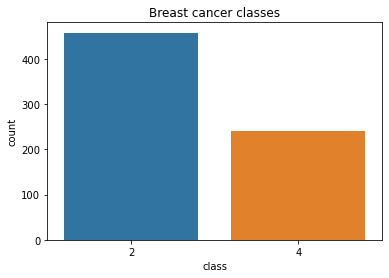

In [16]:
sns.countplot(x="class", data=df)
plt.title("Breast cancer classes")

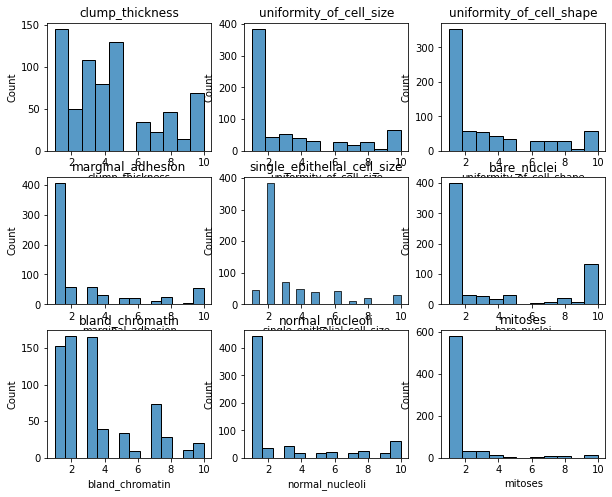

In [22]:
num_columns = [col for col in column_names if col not in ('sample_code_number', 'class')]

plt.figure(figsize=(10,8))
for i, col in enumerate(num_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col])
    plt.title(col)

### Summary

We need to perform the following for data preparation:

* Change the classes to 0 and 1.
* Impute the missing values (most_common)
* Normalize?

## Baseline model

In [31]:
binary_class = {2:0, 4:1}

df["binary_class"] = df["class"].map(binary_class)

In [43]:
X = df[num_columns]
y = df["binary_class"]

In [44]:
imputer = SimpleImputer(strategy='most_frequent')
X = imputer.fit_transform(X)

#scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

In [46]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        95
           1       0.98      0.89      0.93        45

    accuracy                           0.96       140
   macro avg       0.96      0.94      0.95       140
weighted avg       0.96      0.96      0.96       140

